# Задание 03 
## Конфигурационная модель

In [27]:
import numpy as np
from numpy import mean, var
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Конфигурационная модель - генератор случайной сети с заданным распределением степеней вершин. Алгоритм заключается в следующих шагах: 
* каждой  вершине $i$ графа  присваивается $k_i$ «полуребер»;
* из   последовательности таких «полуребер» случайным образом выбирается пара и соответствующие вершины $i$ и $j$ соединяются ребром; 
* предыдущий  шаг  повторяется  до  тех пор,  все ребра не будут задействованы.
![](config01.png)


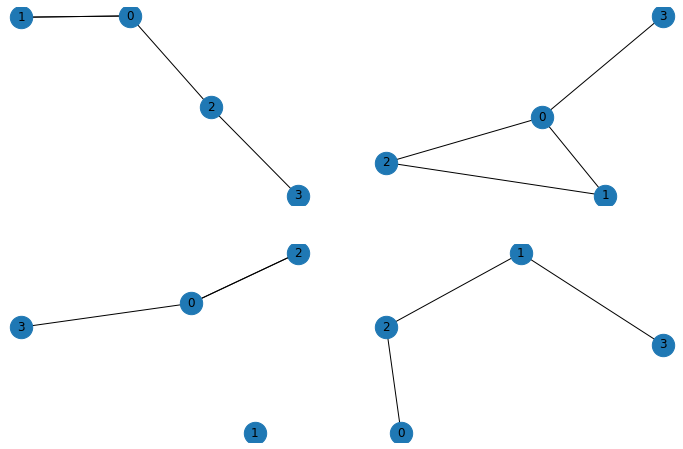

In [28]:
degrees=[3,2,2,1]

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8))

plt.subplot(221)
G=nx.configuration_model(degrees,seed=5)
nx.draw(G,nx.spring_layout(G,iterations=10),node_size=500,with_labels=True)

plt.subplot(222)
G=nx.configuration_model(degrees,seed=10)
nx.draw(G,nx.spring_layout(G,iterations=10),node_size=500,with_labels=True)

plt.subplot(223)
G=nx.configuration_model(degrees,seed=28)
nx.draw(G,nx.spring_layout(G,iterations=10),node_size=500,with_labels=True)

plt.subplot(224)
G=nx.configuration_model(degrees,seed=115)
nx.draw(G,nx.spring_layout(G,iterations=10),node_size=500,with_labels=True)


In [29]:
print(list(G.edges()))
print(list(nx.selfloop_edges(G))) #все петли

[(0, 0), (0, 2), (1, 3), (1, 2)]
[(0, 0)]


### Топология конфигурационной сети:
Ожидаемое число мультиребер:
$$
M=\frac{1}{2} \left(\frac{\langle k^2\rangle-\langle k\rangle}{\langle k\rangle}\right)^2,
$$
Ожидаемое число петель: 
$$
S=\frac{\langle k^2\rangle-\langle k\rangle}{2\langle k\rangle},
$$

Коэффициент кластеризации: 

$$
C=\frac{1}{N} \frac{(\langle k^2\rangle-\langle k\rangle)^2}{\langle k\rangle^3},
$$


#### Задача 1.  Конфигурационная модель сетей со степенным распределением
* напишите функции, вычисляющие по заданному массиву степеней теоретические (ожидаемые) значения числа мультиребер, петель и коэффициент кластеризации;

In [30]:
def expected_topology(k):
    k_sq = [i**2 for i in k]
    M = 1/2 * ((mean(k_sq) - mean(k))/(mean(k)))**2            #ожидаемое число мультиребер
    S = (mean(k_sq) - mean(k))/(2 * mean(k))                   #ожидаемое число петель
    C = 1/len(k) * (mean(k_sq) - (mean(k)))**2/((mean(k))**3)  #ожидаемое число кластеризации 
    return M,S,C
    

In [31]:
M_expected, S_expected, C_expected = expected_topology(degrees)
print("Ожиадаемое M", M_expected)
print("Ожиадаемое S", S_expected)
print("Ожиадаемое C", C_expected)

Ожиадаемое M 0.78125
Ожиадаемое S 0.625
Ожиадаемое C 0.1953125


* напишите функции, вычисляющие число мультиребер, число петель и средний коэффициент кластеризации для заданного мультиграфа; 

In [32]:
def multiedges(G):
    matrix = nx.to_numpy_matrix(G)
    M_real = np.sum(matrix >= 2) / 2          #число мультиребер 
    return M_real

In [33]:
def selfloops(G):
    nodes_in_selfloops = []
    for u, v in G.edges():
        if u == v:
            nodes_in_selfloops.append(u)
    S_real = len(nodes_in_selfloops)          #число петель
    return S_real

In [34]:
def average_clustering(G): 
    G = nx.Graph(G)                            #убираем мультиребра
    G.remove_edges_from(nx.selfloop_edges(G))  #убираем петли    
    C_real = nx.average_clustering(G)          #средний коэф кластеризации    
    return C_real

In [35]:
print("Наблюдаемое M", multiedges(G))
print("Наблюдаемое S", selfloops(G))
print("Наблюдаемое C", average_clustering(G))

Наблюдаемое M 0.0
Наблюдаемое S 1
Наблюдаемое C 0.0


* сгенерируйте значения степеней вершин из степенного распределения для различных значений $\gamma \in \left[2.0, 3.0\right]$. Для этих распределений выведите теоретические (ожидаемые) значения числа мультиребер M, петель S и коэффициента кластеризации C, постройте по заданному массиву степеней конфигурационную модель, вычислите наблюдаемые для полученного графа значения M,S,C. Объясните полученные результаты.

Для генерации массива степеней воспользуйтесь функцией (используется [метод обратного преобразования](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F)):

In [36]:
def power_law(gamma,x_min=2,size=1000): #size - размер массива
    x=np.zeros(size,dtype=int)
    for i in range(size):
        r=np.random.random()
        x[i]=int(x_min*np.float_power((r),1/(-gamma+1)))
    return x

In [37]:
print(power_law(2,size=10))

[ 4  5  4 12 15  2  6  3  8  2]


In [38]:
gammas = np.linspace(2.0, 3.0, num=3)

M_expected = []
S_expected = []
C_expected = []

M_real = []
S_real = []
C_real = []

for gamma in gammas:
    deg = power_law(gamma,size=50)
    while (np.sum(deg) % 2 != 0 ):
        deg = power_law(gamma,size=50)
        
    G1=nx.configuration_model(deg,seed=10)
    M_exp, S_exp, C_exp = expected_topology(deg)
    M_expected.append(M_exp)
    S_expected.append(S_exp)
    C_expected.append(C_exp)
    
    print("Gamma = ", gamma)
    print("Ожидаемое M", M_exp)
    print("Ожидаемое S", S_exp)
    print("Ожидаемое C", C_exp)
    
    M_r, S_r, C_r = multiedges(G1),selfloops(G1),average_clustering(G1)
    M_real.append(M_r)
    S_real.append(S_r)
    C_real.append(C_r)
    print("Наблюдаемое M", M_r)
    print("Наблюдаемое S", S_r)
    print("Наблюдаемое C", C_r)
    print("========================================")

Gamma =  2.0
Ожидаемое M 453.40849186948674
Ожидаемое S 15.056701030927837
Ожидаемое C 2.3371571745849833
Наблюдаемое M 29.0
Наблюдаемое S 17
Наблюдаемое C 0.3845744556547801
Gamma =  2.5
Ожидаемое M 27.17723952326028
Ожидаемое S 3.6862745098039214
Ожидаемое C 0.2664435247378459
Наблюдаемое M 7.0
Наблюдаемое S 1
Наблюдаемое C 0.21733367286308464
Gamma =  3.0
Ожидаемое M 4.7049853907962005
Ожидаемое S 1.5337837837837835
Ожидаемое C 0.06358088365940812
Наблюдаемое M 3.0
Наблюдаемое S 1
Наблюдаемое C 0.04552380952380952


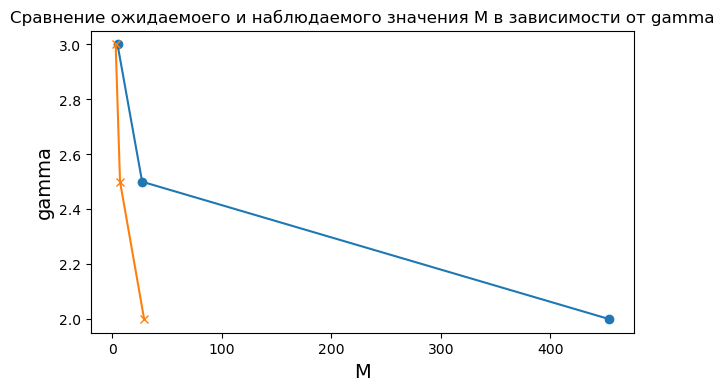

In [39]:
fig = plt.figure(figsize=(7,4),dpi=100)
plt.plot(M_expected, gammas, 'o-')
plt.plot(M_real, gammas, 'x-')
plt.title("Сравнение ожидаемоего и наблюдаемого значения M в зависимости от gamma")
plt.xlabel('M',fontsize=14)
plt.ylabel('gamma',fontsize=14);


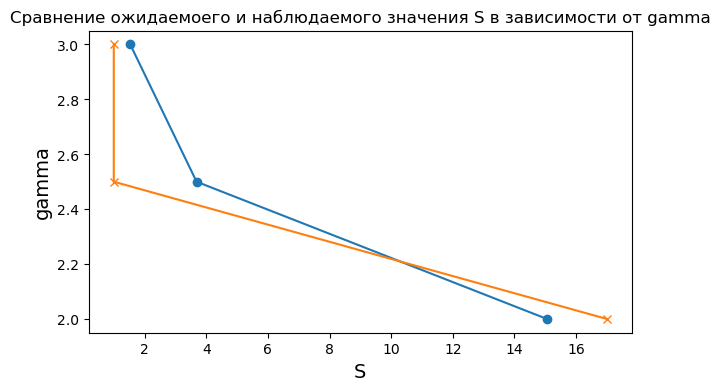

In [40]:
fig = plt.figure(figsize=(7,4),dpi=100)
plt.plot(S_expected, gammas, 'o-')
plt.plot(S_real, gammas, 'x-')
plt.title("Сравнение ожидаемоего и наблюдаемого значения S в зависимости от gamma")
plt.xlabel('S',fontsize=14)
plt.ylabel('gamma',fontsize=14);

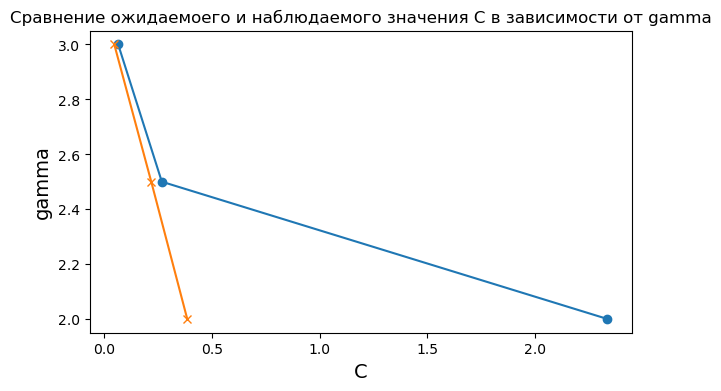

In [41]:
fig = plt.figure(figsize=(7,4),dpi=100)
plt.plot(C_expected, gammas, 'o-')
plt.plot(C_real, gammas, 'x-')
plt.title("Сравнение ожидаемоего и наблюдаемого значения C в зависимости от gamma")
plt.xlabel('C',fontsize=14)
plt.ylabel('gamma',fontsize=14);

$\underline{Вывод:}$Как видно из графиков выше, значения наблюдаемых и ожидаемых количеств мультиребер, петель, значения коэффициента кластеризации зависит от значения параметра $\gamma$  степенного распределения. Наименьшая разница между ожидаемыми и наблюдаемыми значениями будет при наивысшем значении $\gamma$ = 3.0. 

#### Задание 2. Распределение степеней ближайших соседей
 * Пусть $\gamma=3$, сгенерируйте массив степеней из степенного распределения, постройте несколько конфигурационных моделей для полученного массива;
 * для каждой вершины определите степени её ближайших соседей, объедините все значения в один массив и постройте распределение степеней. Определите среднее и дисперсию, отличаются ли они от среднего значения степени  вршин в сети и дисперсии? Объясните результаты. 

In [42]:
deg = power_law(3.0,size=1000)
while (np.sum(deg) % 2 != 0 ):
    deg = power_law(3.0,size=1000)
G1 = nx.configuration_model(deg,seed=10)
G2 = nx.configuration_model(deg,seed=50)
G3 = nx.configuration_model(deg,seed=100)
Gs = [G1, G2, G3]

Мат ожидание (степени ближ соседей) G1 11.228531073446328
Дисперсия (степени ближ соседей) G1 427.49946846372376
Мат ожидание (степени сети) 3.604
Дисперсия (степени сети) 30.395183999999997
Мат ожидание (степени ближ соседей) G2 11.393683023124648
Дисперсия (степени ближ соседей) G2 442.51619247030965
Мат ожидание (степени сети) 3.604
Дисперсия (степени сети) 30.395183999999997
Мат ожидание (степени ближ соседей) G3 11.7758813654169
Дисперсия (степени ближ соседей) G3 466.99425880629525
Мат ожидание (степени сети) 3.604
Дисперсия (степени сети) 30.395183999999997


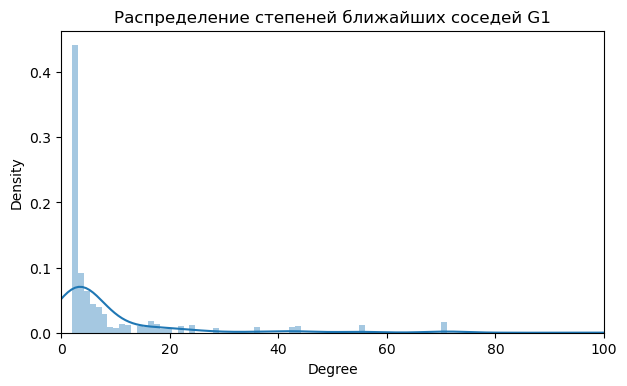

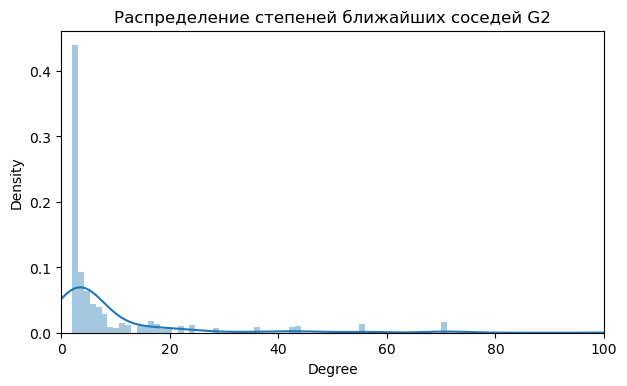

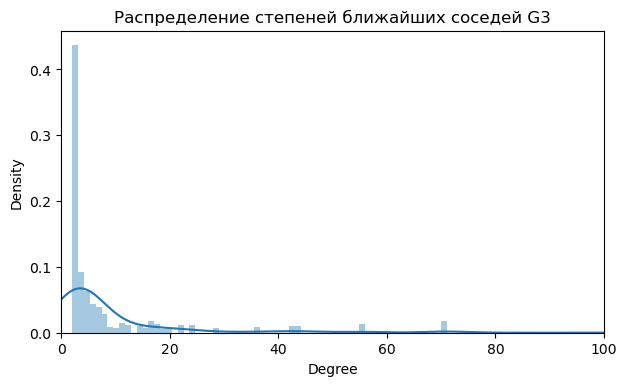

In [43]:
for i,G in enumerate(Gs):
    degrees = []
    for node in G.nodes():
        for nn in nx.neighbors(G,node):
            degrees.append(G.degree[nn])
    fig,ax = plt.subplots(1, 1, figsize=(7,4),dpi=100)
    sns.distplot(degrees, hist=True, kde=True, bins=100).set_title("Распределение степеней ближайших соседей G" +str(i+1))
    plt.xlabel("Degree")
    plt.xlim(0, 100)
    print("Мат ожидание (степени ближ соседей) G"+str(i+1), mean(degrees))
    print("Дисперсия (степени ближ соседей) G"+str(i+1), var(degrees))
    print("Мат ожидание (степени сети)", mean(deg))
    print("Дисперсия (степени сети)", var(deg))
    print("===========================")
        

$\underline{Вывод:}$ Из сравнения результатов значений математического ожидания и дисперсии степеней сети и степеней ближайших соседей, можно сделать вывод, что наблюдается "парадокс дружбы". Смысл данного парадокса состоит в том, что, как правило, у каждого человека друзей меньше, чем в среднем у его друзей.
$$ <k>_{NN} = \frac{<k^2>}{<k>} > <k>$$


#### Задача 2. Конфигурационная модель сложной сети 
* постройте конфигурационную модель сети заболеваний;
* сравните топологические характеристики сложной сети и ее конфигурационной модели: коэффициент кластеризации, транзитивность, средний кратчайший путь.

In [44]:
G=nx.read_edgelist('bio-diseasome.txt')

In [45]:
print("Сложная сеть")
print("Средний коэффициент кластеризации = ",nx.average_clustering(G))
print("Транзитивность = ", nx.transitivity(G))
print("Средний кратчайший путь = ", nx.average_shortest_path_length(G))

Сложная сеть
Средний коэффициент кластеризации =  0.6358304997771197
Транзитивность =  0.4304705634100021
Средний кратчайший путь =  6.5089937532926925


In [46]:
d = [(int(node), val) for (node, val) in G.degree()]
new_degrees = [val for (node, val) in sorted(d, key=lambda pair: pair[0])] #распределение степеней вершин 

In [47]:
conf_model = nx.configuration_model(new_degrees,seed=5)

In [48]:
def transitivity(G): 
    G = nx.Graph(G)                             #убираем мультиребра
    G.remove_edges_from(nx.selfloop_edges(G))   #убираем петли
    T = nx.transitivity(G)
    return T

In [49]:
print("Конфигурационная модель")
print("Средний коэффициент кластеризации = ",average_clustering(conf_model))
print("Транзитивность = ", transitivity(conf_model))
print("Средний кратчайший путь = ", nx.average_shortest_path_length(conf_model))

Конфигурационная модель
Средний коэффициент кластеризации =  0.011281572382738652
Транзитивность =  0.021592596823946077
Средний кратчайший путь =  3.9605102731993678
